In [1]:
# ! pip install -U matplotlib
# ! pip install -U numpy
# ! pip install -U scipy
# ! pip install ipympl

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, ifft
%matplotlib widget

In [3]:
def plot(*args):
    ax = plt.figure()
    for idx in range(0, len(args), 2):
        x, y = args[idx], args[idx + 1]
        plt.plot(x, y)
    plt.grid(True)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

## Свёртка и деконволюция


### Свёртка


In [4]:
def convolve_element(
        f_array: np.ndarray,
        g_array: np.ndarray,
        k: int) -> np.ndarray:
    """ Свёртка элемента """

    def get_f(idx: int):
        """ 
        Получаем значение f
        Если индекс выходит за пределы массива, то возвращаем 0
        """
        if idx >= 0 and idx < f_array.size:
            return f_array[idx]
        return 0

    result = np.zeros(g_array.size)
    for idx in range(k - g_array.size, k):
        result[g_array.size - (k - idx)] = get_f(idx) * g_array[k - idx - 1]
    return np.sum(result)

In [5]:
def convolve(
    array_1: np.ndarray,
    array_2: np.ndarray
) -> np.ndarray:

    result = np.zeros(array_1.size + array_2.size)
    for idx in range(1, result.size):
        result[idx] = convolve_element(array_1, array_2, idx)
    return result

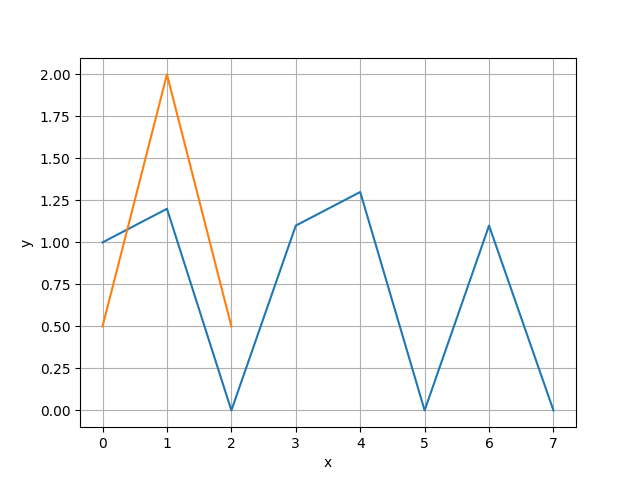

In [6]:
y_1 = np.array([1.0, 1.2, 0.0, 1.1, 1.3, 0.0, 1.1, 0.0])
x_1 = np.arange(stop=y_1.size)

y_2 = np.array([0.5, 2, 0.5])
x_2 = np.arange(stop=y_2.size)
plot(x_1, y_1, x_2, y_2)

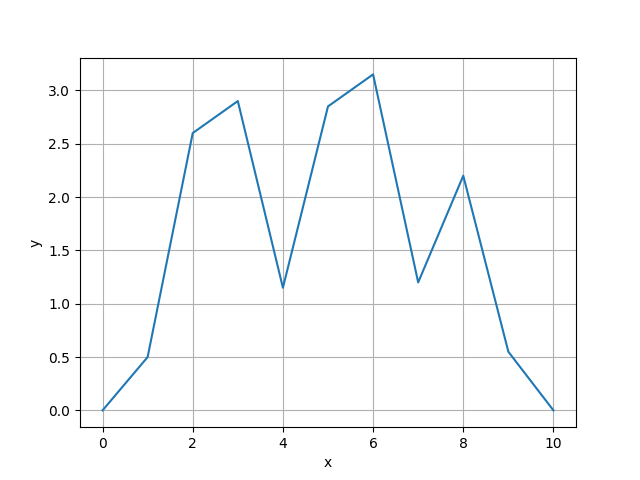

In [7]:
convolved = convolve(y_1, y_2)
expected = np.zeros(convolved.size)
expected[1:] = signal.convolve(y_1, y_2, mode='full')
np.testing.assert_array_equal(convolved, expected)
plot(np.arange(convolved.size), convolved)

### Деконволюция


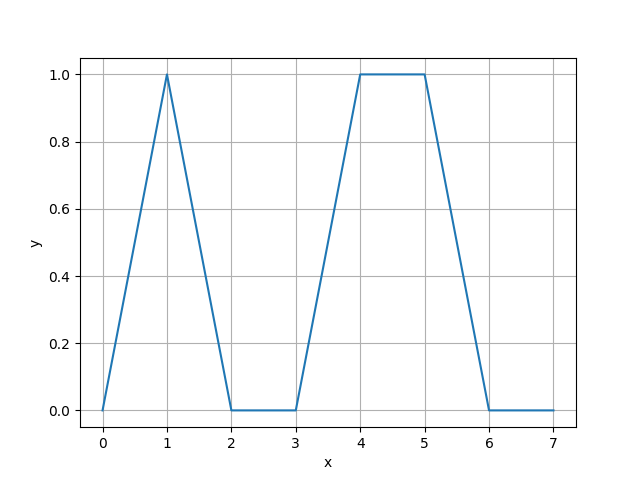

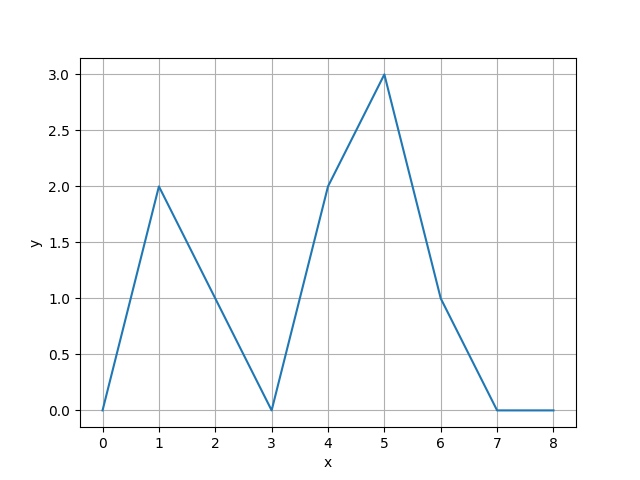

array([0, 2, 1, 0, 2, 3, 1, 0, 0])

In [44]:
y_1 = np.array([1., 1.2, 0., 1.1, 1.3, 0, 1.1, 0])
y_2 = np.array([0.5, 2, 0.5])
y_1 = np.array([0, 1, 0, 0, 1, 1, 0, 0])
y_2 = np.array([2, 1])
convoluted_singnal = signal.convolve(y_1, y_2)
plot(np.arange(y_1.size), y_1)
plot(np.arange(convoluted_singnal.size), convoluted_singnal)
convoluted_singnal

In [45]:
def zero_fill(
    array: np.ndarray,
    like: np.ndarray
) -> np.ndarray:
    result = np.zeros(like.size)
    result[0:array.size] = array
    return result

In [46]:
dft_signal = np.fft.fft(convoluted_singnal)
impulse_response = zero_fill(y_2, convoluted_singnal)
dft_impulse_response = np.fft.fft(impulse_response)

## Вот с этого момента всё ломается


In [47]:
dft_deconv = np.zeros(dft_signal.size, dtype=np.float64)
for idx in range(dft_deconv.size):
    if dft_impulse_response[idx] != 0.0:
        dft_deconv[idx] = dft_signal[idx] / np.real(dft_impulse_response[idx])
    else:
        dft_deconv[idx] = 0
dft_deconv

C:\Users\playe\AppData\Local\Temp\ipykernel_19236\150218280.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  dft_deconv[idx] = dft_signal[idx] / np.real(dft_impulse_response[idx])


array([ 3.        , -1.26271508,  1.2595534 , -2.        , -0.70272067,
       -0.70272067, -2.        ,  1.2595534 , -1.26271508])

In [48]:
deconvolved_signal = np.fft.ifft(dft_deconv)
deconvolved_signal

array([-0.26797386+0.00000000e+00j,  0.53594771+0.00000000e+00j,
        0.12418301+7.40148683e-17j, -0.03267974+0.00000000e+00j,
        1.00653595+3.73909411e-17j,  1.00653595-1.56411821e-17j,
       -0.03267974+0.00000000e+00j,  0.12418301-3.73909411e-17j,
        0.53594771-5.83736862e-17j])

C:\Users\playe\AppData\Local\Temp\ipykernel_19236\3523861038.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  ax = plt.figure()
c:\Users\playe\miniconda3\envs\ivc\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


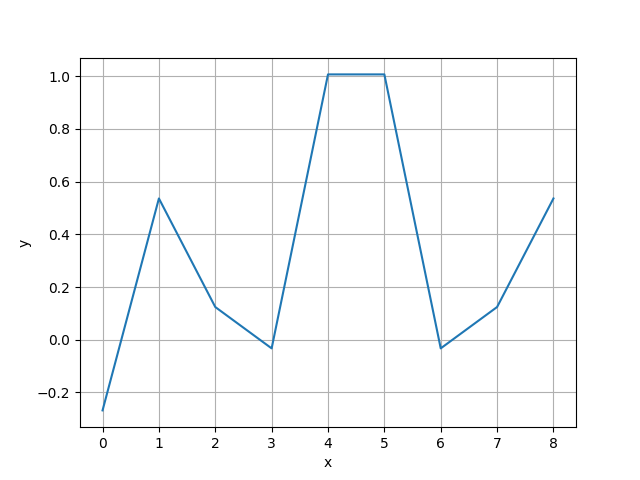

In [49]:
plot(np.arange(stop=deconvolved_signal.size), deconvolved_signal)